# 차분(Differencing) 과 이동평균(MA)

In [1]:
#!pip install --upgrade finance-datareader
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [3]:
# Facebook(META)의 주가 데이터를 2017년 8월 9일부터 불러옵니다.
fb = fdr.DataReader("META", start="20170809")    # Facebook

# Microsoft(MSFT)의 주가 데이터를 2017년 8월 9일부터 불러옵니다.
ms = fdr.DataReader("MSFT", start="20170809")  # Microsoft

ms

,Open,High,Low,Close,Volume,Adj Close
2017-08-08,72.089996,73.129997,71.750000,72.790001,22044600,66.881645
2017-08-09,72.250000,72.510002,72.050003,72.470001,22213400,66.587631
2017-08-10,71.900002,72.190002,71.349998,71.410004,24734500,65.613655
2017-08-11,71.610001,72.699997,71.279999,72.500000,21443700,66.615158
2017-08-14,73.059998,73.720001,72.949997,73.589996,20096600,67.616684
...,...,...,...,...,...,...
2024-11-11,422.519989,424.809998,416.000000,418.010010,24503300,418.010010
2024-11-12,418.250000,424.440002,417.200012,423.029999,19401200,423.029999
2024-11-13,421.640015,429.329987,418.209991,425.200012,21502200,425.200012
2024-11-14,425.000000,428.170013,420.000000,426.890015,30246900,426.890015


In [4]:
fb.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)

In [5]:
# Facebook(META) 주가 데이터에 '어제 종가(Yesterday Close)' 열을 추가합니다.
# 'Close' 열을 기준으로 데이터를 한 행씩 아래로 이동시켜 전일 종가 데이터를 만듭니다.
fb['Yesterday Close'] = fb['Close'].shift(1)

fb.head()

,Close,Yesterday Close
2017-08-08,171.229996,NaN
2017-08-09,171.179993,171.229996
2017-08-10,167.399994,171.179993
2017-08-11,168.080002,167.399994
2017-08-14,170.750000,168.080002


Price Difference - manual 계산

In [6]:
# Facebook(META) 주가 데이터에 '가격 차이(Price Difference)' 열을 추가합니다.
# 'Price Difference'는 당일 종가('Close')에서 전일 종가('Yesterday Close')를 뺀 값으로 계산됩니다.
fb['Price Difference'] = fb['Close'] - fb['Yesterday Close']

fb.head()

,Close,Yesterday Close,Price Difference
2017-08-08,171.229996,NaN,NaN
2017-08-09,171.179993,171.229996,-0.050003
2017-08-10,167.399994,171.179993,-3.779999
2017-08-11,168.080002,167.399994,0.680008
2017-08-14,170.750000,168.080002,2.669998


Price Difference - diff() method 사용

In [7]:
# Facebook(META) 주가 데이터에 '가격 차이 2(Price Diff2)' 열을 추가합니다.
# 'Price Diff2'는 pandas의 diff() 함수를 사용하여 'Close' 열에서 하루 전 종가와의 차이를 계산한 값입니다.
fb['Price Diff2'] = fb['Close'].diff()

fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
2017-08-08,171.229996,NaN,NaN,NaN
2017-08-09,171.179993,171.229996,-0.050003,-0.050003
2017-08-10,167.399994,171.179993,-3.779999,-3.779999
2017-08-11,168.080002,167.399994,0.680008,0.680008
2017-08-14,170.750000,168.080002,2.669998,2.669998


In [8]:
# Microsoft(MSFT) 주가 데이터에 '어제 종가(Yesterday Close)' 열을 추가합니다.
# 'Yesterday Close'는 'Close' 열을 기준으로 데이터를 한 행씩 아래로 이동시켜 전일 종가를 나타냅니다.
ms['Yesterday Close'] = ms['Close'].shift(1)

# Microsoft 주가 데이터에 '가격 차이(Price Difference)' 열을 추가합니다.
# 'Price Difference'는 pandas의 diff() 함수를 사용하여 'Close' 열에서 하루 전 종가와의 차이를 계산한 값입니다.
ms['Price Difference'] = ms['Close'].diff()

ms.head()

,Close,Yesterday Close,Price Difference
2017-08-08,72.790001,NaN,NaN
2017-08-09,72.470001,72.790001,-0.320000
2017-08-10,71.410004,72.470001,-1.059998
2017-08-11,72.500000,71.410004,1.089996
2017-08-14,73.589996,72.500000,1.089996


In [9]:
print(ms['Price Difference'].loc['2017-11-03'])

0.089996337890625


In [10]:
ms.head()

,Close,Yesterday Close,Price Difference
2017-08-08,72.790001,NaN,NaN
2017-08-09,72.470001,72.790001,-0.320000
2017-08-10,71.410004,72.470001,-1.059998
2017-08-11,72.500000,71.410004,1.089996
2017-08-14,73.589996,72.500000,1.089996


차분한 값으로부터 원래의 값 복원하기

In [11]:
# Microsoft 주가 데이터에서 'Price Difference'의 누적 합(cumsum)을 계산하고, 첫 번째 종가 값(ms['Close'].iloc[0])을 더합니다.
# 이는 첫 번째 종가에서부터 매일 가격 변동을 누적하여 계산한 값을 의미합니다.
ms['Price Difference'].cumsum() + ms['Close'].iloc[0]

2017-08-08           NaN
2017-08-09     72.470001
2017-08-10     71.410004
2017-08-11     72.500000
2017-08-14     73.589996
                 ...    
2024-11-11    418.010010
2024-11-12    423.029999
2024-11-13    425.200012
2024-11-14    426.890015
2024-11-15    415.000000
Name: Price Difference, Length: 1832, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [12]:
# Microsoft 주가 데이터에 '수익률(Return)' 열을 추가합니다.
# 'Return'은 당일 종가('Close')를 전일 종가('Yesterday Close')로 나눈 값에서 1을 뺀 값으로, 일간 수익률을 나타냅니다.
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1

ms.head()

,Close,Yesterday Close,Price Difference,Return
2017-08-08,72.790001,NaN,NaN,NaN
2017-08-09,72.470001,72.790001,-0.320000,-0.004396
2017-08-10,71.410004,72.470001,-1.059998,-0.014627
2017-08-11,72.500000,71.410004,1.089996,0.015264
2017-08-14,73.589996,72.500000,1.089996,0.015034


In [13]:
ms['Close'][1:][:3]

2017-08-09    72.470001
2017-08-10    71.410004
2017-08-11    72.500000
Name: Close, dtype: float64

In [14]:
# Microsoft 주가 데이터에서 일간 수익률을 계산하는 또 다른 방법입니다.
# 'Close'[1:]은 첫 번째 행 이후의 종가 데이터를, 'Close'[:-1]은 마지막 행 전까지의 종가 데이터를 나타냅니다.
# 이를 통해 당일 종가를 전일 종가로 나눈 후, 1을 빼서 수익률을 계산합니다.
ms['Close'][1:] / ms['Close'][:-1].values - 1

2017-08-09   -0.004396
2017-08-10   -0.014627
2017-08-11    0.015264
2017-08-14    0.015034
2017-08-15   -0.005028
                ...   
2024-11-11   -0.010721
2024-11-12    0.012009
2024-11-13    0.005130
2024-11-14    0.003975
2024-11-15   -0.027853
Name: Close, Length: 1831, dtype: float64

In [15]:
# Microsoft 주가 데이터에서 'Close' 열의 일간 변동률(percentage change)을 계산합니다.
# pct_change() 함수는 각 행에서 이전 행과의 퍼센트 변동률을 계산해 줍니다.
# 이를 통해 하루 전 종가 대비 주가가 얼마나 변동했는지를 백분율로 나타냅니다.
ms['Close'].pct_change()

2017-08-08         NaN
2017-08-09   -0.004396
2017-08-10   -0.014627
2017-08-11    0.015264
2017-08-14    0.015034
                ...   
2024-11-11   -0.010721
2024-11-12    0.012009
2024-11-13    0.005130
2024-11-14    0.003975
2024-11-15   -0.027853
Name: Close, Length: 1832, dtype: float64

In [16]:
# Microsoft 주가 데이터에서 첫 번째 날짜(ms.index[0])부터 마지막 날짜(ms.index[-1])까지의 날짜 범위를 생성하고,
# 해당 기간 동안의 총 일수를 출력합니다.
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1주를 계속 보유하였다면 누적 수익률은")

# 'Return' 열에서 각 일간 수익률에 1을 더한 값을 누적 곱(cumprod)하여 누적 수익률을 계산합니다.
# cumprod() 함수는 수익률을 계속 곱해 나가며 최종적으로 기간 동안의 누적 수익률을 계산합니다.
print((1 + ms['Return']).cumprod())

2657 일간 1주를 계속 보유하였다면 누적 수익률은
2017-08-08         NaN
2017-08-09    0.995604
2017-08-10    0.981041
2017-08-11    0.996016
2017-08-14    1.010990
                ...   
2024-11-11    5.742684
2024-11-12    5.811650
2024-11-13    5.841462
2024-11-14    5.864679
2024-11-15    5.701333
Name: Return, Length: 1832, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [17]:
# Facebook(META) 주가 데이터에서 3일 이동평균을 계산합니다.
# 'Close' 열과 그 전날('shift(1)'), 이틀 전('shift(2)')의 'Close' 값을 더한 후 3으로 나누어 3일 이동평균을 구합니다.
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

2017-08-08           NaN
2017-08-09           NaN
2017-08-10    169.936661
2017-08-11    168.886663
2017-08-14    168.743332
                 ...    
2024-11-11    588.070007
2024-11-12    585.776672
2024-11-13    582.663330
2024-11-14    580.659993
2024-11-15    570.413330
Name: Close, Length: 1832, dtype: float64

In [18]:
# Facebook(META) 주가 데이터에서 'Close' 열을 기준으로 3일 이동평균을 계산합니다.
# rolling(3)은 3일 간격으로 이동평균을 계산하며, mean() 함수로 그 평균값을 구합니다.
fb['Close'].rolling(3).mean()

2017-08-08           NaN
2017-08-09           NaN
2017-08-10    169.936661
2017-08-11    168.886663
2017-08-14    168.743332
                 ...    
2024-11-11    588.070007
2024-11-12    585.776672
2024-11-13    582.663330
2024-11-14    580.659993
2024-11-15    570.413330
Name: Close, Length: 1832, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

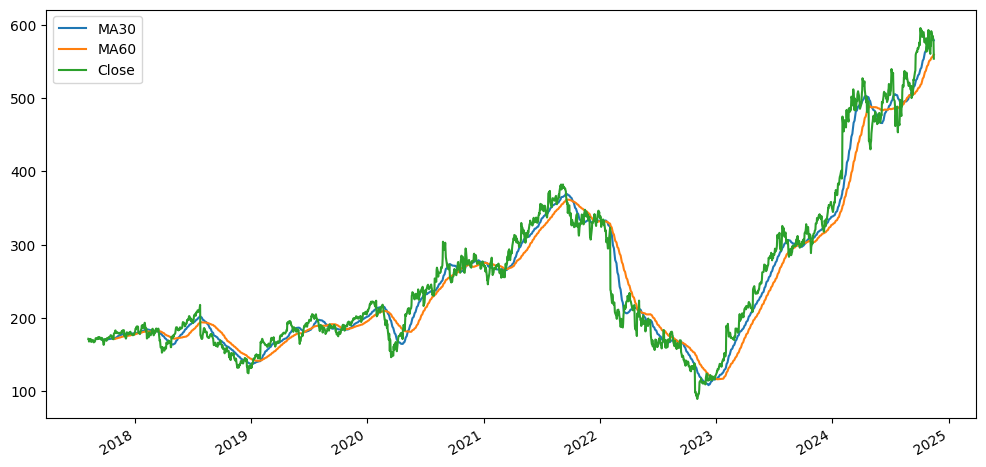

In [19]:
# Facebook(META) 주가 데이터에 30일 이동평균(ma30)과 60일 이동평균(ma60)을 각각 추가합니다.
fb['ma30'] = fb['Close'].rolling(30).mean()  # 30일 이동평균 계산
fb['ma60'] = fb['Close'].rolling(60).mean()  # 60일 이동평균 계산

# 이동평균을 시각화
plt.figure(figsize=(12, 6))

# 30일 이동평균을 플로팅하고, label을 'MA30'으로 설정합니다.
fb['ma30'].plot(label='MA30')

# 60일 이동평균을 플로팅하고, label을 'MA60'으로 설정합니다.
fb['ma60'].plot(label='MA60')

# 실제 종가('Close')를 플로팅하고, label을 'Close'로 설정합니다.
fb['Close'].plot(label='Close')

plt.legend()
plt.show()

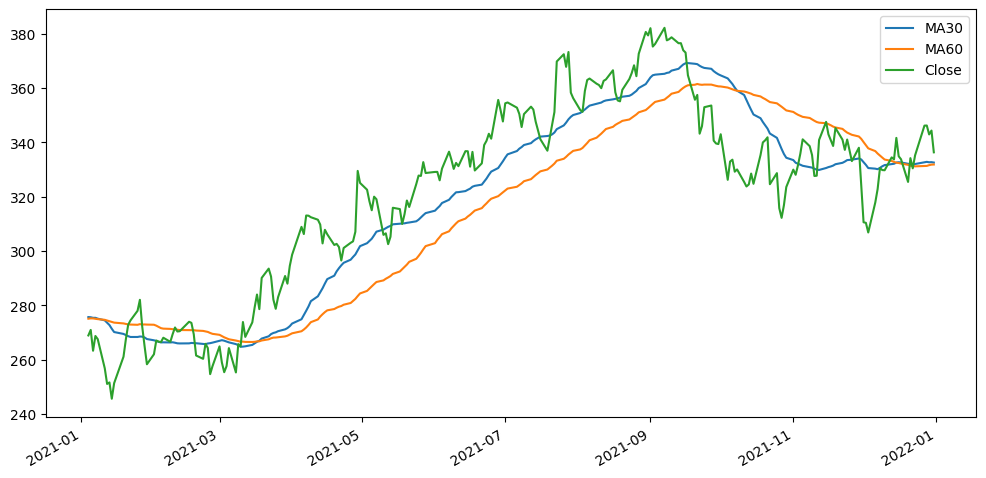

In [20]:
# 특정 기간(2021년 1월 1일 ~ 2021년 12월 31일) 동안의 이동평균을 플로팅
plt.figure(figsize=(12, 6))  # 그래프 크기를 12x6으로 설정합니다.

# 30일 이동평균(ma30)에서 2021년의 데이터를 선택하여 플로팅하고, label을 'MA30'으로 설정합니다.
fb['ma30'].loc['2021-01-01':'2021-12-31'].plot(label='MA30')

# 60일 이동평균(ma60)에서 2021년의 데이터를 선택하여 플로팅하고, label을 'MA60'으로 설정합니다.
fb['ma60'].loc['2021-01-01':'2021-12-31'].plot(label='MA60')

# 실제 종가('Close')에서 2021년의 데이터를 선택하여 플로팅하고, label을 'Close'로 설정합니다.
fb['Close'].loc['2021-01-01':'2021-12-31'].plot(label='Close')

plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [21]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


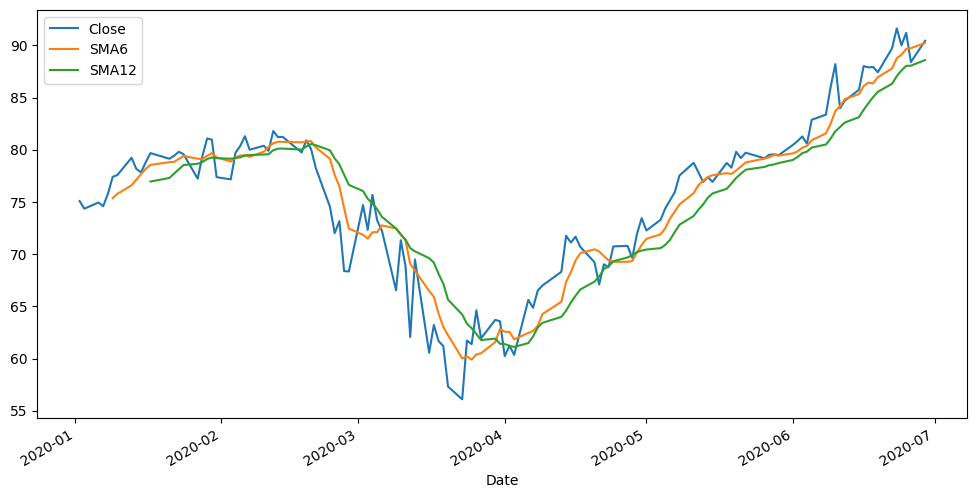

In [22]:
# 단순 이동평균(SMA: Simple Moving Average) 계산
# 6일 이동평균(SMA6)을 'Close' 열을 기준으로 계산하여 데이터프레임(df)에 추가합니다.
df['SMA6'] = df['Close'].rolling(window=6).mean()

# 12일 이동평균(SMA12)을 'Close' 열을 기준으로 계산하여 데이터프레임(df)에 추가합니다.
df['SMA12'] = df['Close'].rolling(window=12).mean()

# 이동평균과 주가 데이터를 시각화
# 그래프 크기를 12x6으로 설정한 후, df 데이터프레임 전체를 플로팅합니다.
df.plot(figsize=(12, 6))
plt.show()

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [23]:
# 지수 가중 이동평균(EWMA: Exponentially Weighted Moving Average) 계산
# 12일 지수 가중 이동평균(EWMA12)을 'Close' 열을 기준으로 계산하여 데이터프레임(df)에 추가합니다.
# ewm(span=12)은 지수 가중 평균을 계산할 때 사용되며, span은 기간을 의미합니다.
df['EWMA12'] = df['Close'].ewm(span=12).mean()

# 데이터프레임(df)의 마지막 5줄을 출력하여 확인합니다.
df.tail()

,Close,SMA6,SMA12,EWMA12
Date,,,,
2020-06-23,91.632500,88.771666,87.052082,87.036708
2020-06-24,90.014999,89.104167,87.606249,87.494907
2020-06-25,91.209999,89.656250,88.040624,88.066459
2020-06-26,88.407501,89.735416,88.057082,88.118927
2020-06-29,90.445000,90.237916,88.596249,88.476785


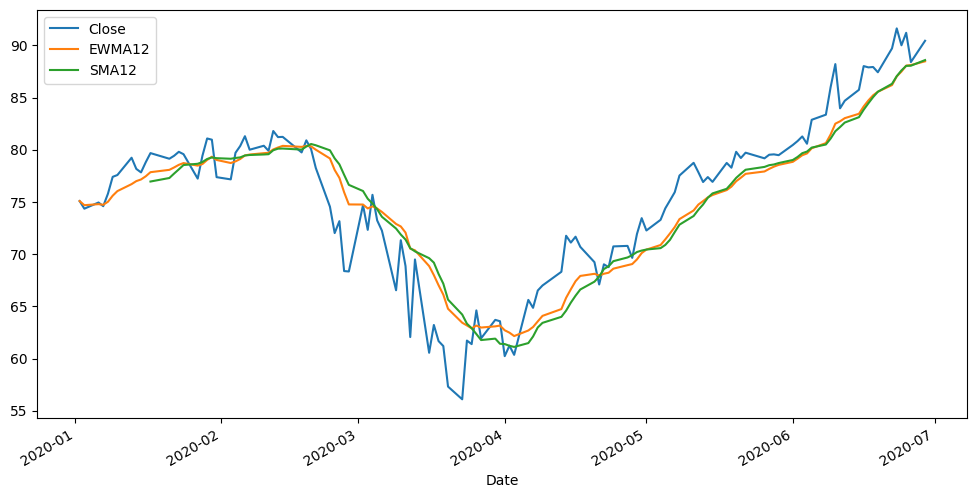

In [24]:
# 'Close', 'EWMA12', 'SMA12' 열을 함께 시각화
# 데이터프레임(df)에서 'Close'(종가), 'EWMA12'(12일 지수 가중 이동평균), 'SMA12'(12일 단순 이동평균) 열을 선택하여 플로팅합니다.
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))
plt.show()